In [179]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from itertools import combinations_with_replacement
import copy

In [180]:
train_df = pd.read_csv("Seniors.csv",index_col=0)
print(train_df.head())

   Temperature (°C)  Pressure (kPa)  Temperature x Pressure  \
0        209.762701        8.050855             1688.769167   
1        243.037873       15.812068             3842.931469   
2        220.552675        7.843130             1729.823314   
3        208.976637       23.786089             4970.736918   
4        184.730960       15.797812             2918.345014   

   Material Fusion Metric  Material Transformation Metric  Quality Rating  
0            44522.217074                    9.229576e+06       99.999971  
1            63020.764997                    1.435537e+07       99.985703  
2            49125.950249                    1.072839e+07       99.999758  
3            57128.881547                    9.125702e+06       99.999975  
4            38068.201283                    6.303792e+06      100.000000  


In [181]:
#loading dataframe whose output is to be predicted
output_df = pd.read_csv("Juniors.csv",index_col=0)
output_df.drop("Unnamed: 0",axis=1,inplace=True)
print(output_df.head())

   Temperature (°C)  Pressure (kPa)  Temperature x Pressure  \
0        270.264688       11.023763             2979.333789   
1        147.113440       24.851899             3656.048303   
2        251.636694       19.861983             4998.003812   
3        226.765023       23.301227             5283.903266   
4        291.025207       16.896895             4917.422268   

   Material Fusion Metric  Material Transformation Metric  
0            74382.645868                    1.974082e+07  
1            36991.316027                    3.183265e+06  
2            71156.545998                    1.593350e+07  
3            64073.710961                    1.166025e+07  
4            89519.819801                    2.464829e+07  


In [182]:
#splitting training data into features and target
x_train = train_df.drop("Quality Rating",axis=1)
y_train = train_df.iloc[:,-1].to_numpy()
print(f"X: {x_train.head()}\n\ny:{y_train[:5]}")

X:    Temperature (°C)  Pressure (kPa)  Temperature x Pressure  \
0        209.762701        8.050855             1688.769167   
1        243.037873       15.812068             3842.931469   
2        220.552675        7.843130             1729.823314   
3        208.976637       23.786089             4970.736918   
4        184.730960       15.797812             2918.345014   

   Material Fusion Metric  Material Transformation Metric  
0            44522.217074                    9.229576e+06  
1            63020.764997                    1.435537e+07  
2            49125.950249                    1.072839e+07  
3            57128.881547                    9.125702e+06  
4            38068.201283                    6.303792e+06  

y:[99.99997052 99.98570341 99.99975761 99.99997484 99.99999986]


In [183]:
#z score normalisation - feature scaling
x_mu = np.mean(x_train,axis=0)
x_sigma = np.std(x_train, axis=0)
x_sigma[x_sigma == 0] = 1
x_norm = ((x_train - x_mu)/x_sigma)
print(f"X_mu = \n{x_mu}, \n\nX_sigma = \n{x_sigma}\n")
print(f"\nPeak to Peak range by column in Raw        X:\n{np.ptp(x_train,axis=0)}") #range of each col
print(f"\nPeak to Peak range by column in Normalized X:\n{np.ptp(x_norm,axis=0)}")

X_mu = 
Temperature (°C)                  2.006538e+02
Pressure (kPa)                    1.480094e+01
Temperature x Pressure            2.966561e+03
Material Fusion Metric            4.838517e+04
Material Transformation Metric    1.014740e+07
dtype: float64, 

X_sigma = 
Temperature (°C)                  5.860425e+01
Pressure (kPa)                    5.703704e+00
Temperature x Pressure            1.461110e+03
Material Fusion Metric            2.404911e+04
Material Transformation Metric    7.676761e+06
dtype: float64


Peak to Peak range by column in Raw        X:
Temperature (°C)                  1.999470e+02
Pressure (kPa)                    1.998931e+01
Temperature x Pressure            6.851312e+03
Material Fusion Metric            9.359921e+04
Material Transformation Metric    2.598965e+07
dtype: float64

Peak to Peak range by column in Normalized X:
Temperature (°C)                  3.411817
Pressure (kPa)                    3.504619
Temperature x Pressure            4.689114
Mate

In [184]:
#z score normalisation for output df
x_mu_t = np.mean(output_df,axis=0)
x_sigma_t = np.std(output_df, axis=0)
x_sigma_t[x_sigma_t == 0] = 1  #replace zero standard deviations with 1 because all values identical(avoid division by 0)
x_norm_t = ((output_df - x_mu_t)/x_sigma_t)
print(f"X_mu = \n{x_mu}, \n\nX_sigma = \n{x_sigma}\n")
print(f"\nPeak to Peak range by column in Raw        X:\n{np.ptp(output_df,axis=0)}") #range of each col
print(f"\nPeak to Peak range by column in Normalized X:\n{np.ptp(x_norm_t,axis=0)}")

X_mu = 
Temperature (°C)                  2.006538e+02
Pressure (kPa)                    1.480094e+01
Temperature x Pressure            2.966561e+03
Material Fusion Metric            4.838517e+04
Material Transformation Metric    1.014740e+07
dtype: float64, 

X_sigma = 
Temperature (°C)                  5.860425e+01
Pressure (kPa)                    5.703704e+00
Temperature x Pressure            1.461110e+03
Material Fusion Metric            2.404911e+04
Material Transformation Metric    7.676761e+06
dtype: float64


Peak to Peak range by column in Raw        X:
Temperature (°C)                  1.999783e+02
Pressure (kPa)                    1.999116e+01
Temperature x Pressure            6.749888e+03
Material Fusion Metric            9.243874e+04
Material Transformation Metric    2.599784e+07
dtype: float64

Peak to Peak range by column in Normalized X:
Temperature (°C)                  3.490812
Pressure (kPa)                    3.396726
Temperature x Pressure            4.646902
Mate

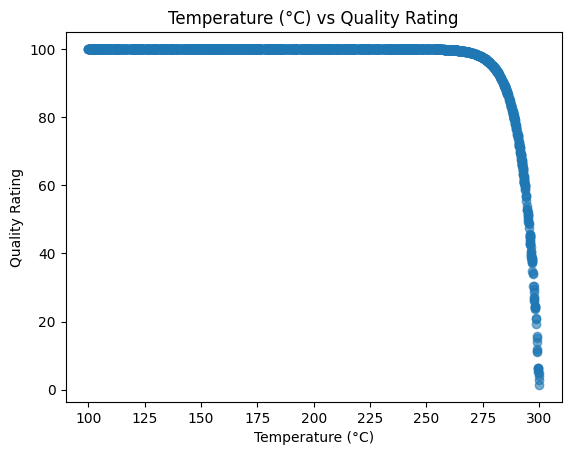

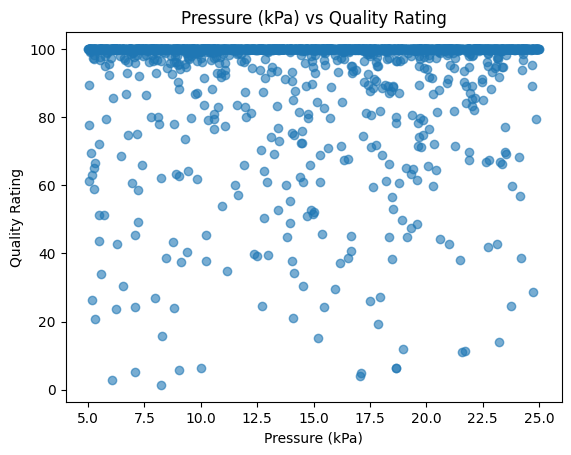

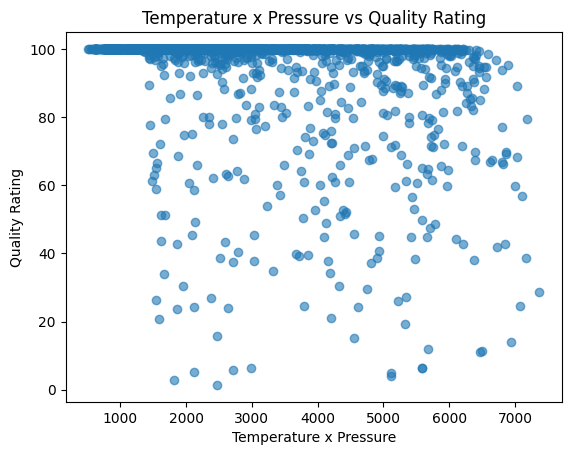

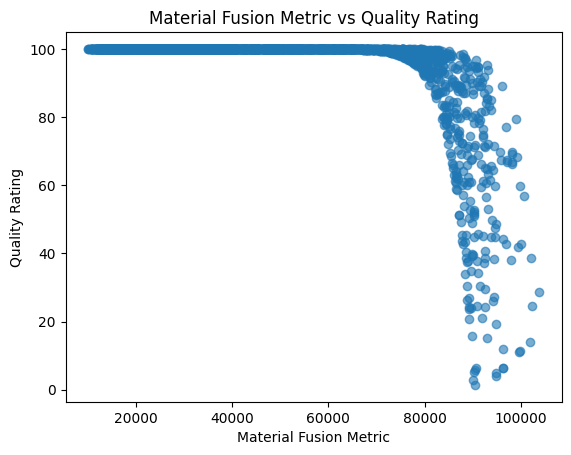

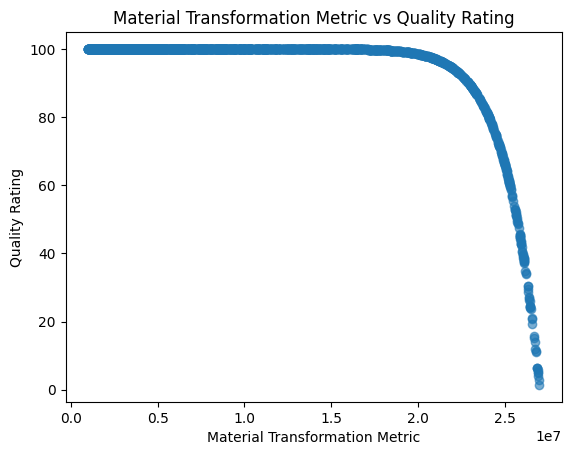

In [185]:
for i in x_train.columns:
    if i != "Quality Rating":
        plt.scatter(x_train[i], y_train, alpha=0.6)
        plt.title(f"{i} vs Quality Rating")
        plt.xlabel(i)
        plt.ylabel("Quality Rating")
        plt.show()

Clearly, linear regression will not yeild very satisfactory results. Attempting polynomial regression and dropping columns "Pressure" and "Temperature x Pressure" since they dont seem to have any direct correlation with the data.

In [186]:
x_norm.drop(columns=["Pressure (kPa)", "Temperature x Pressure"], inplace=True)
x_norm_t.drop(columns=["Pressure (kPa)", "Temperature x Pressure"], inplace=True)
print(f"Training dataset(updated):\n{x_norm[:5]}")

Training dataset(updated):
   Temperature (°C)  Material Fusion Metric  Material Transformation Metric
0          0.155431               -0.160628                       -0.119559
1          0.723225                0.608571                        0.548143
2          0.339547                0.030803                        0.075681
3          0.142018                0.363577                       -0.133090
4         -0.271701               -0.428996                       -0.500682


In [187]:
def poly_features(x,degree):
  m,n = x.shape
  x_trans = [np.ones(m)]
  for j in range(1,degree+1):
    for i in combinations_with_replacement(range(n),j): #create all combinations of features upto given degree. replacement means that same index can appear multiple times
      x_trans.append(np.prod(x[:,i], axis=1))

  return np.vstack(x_trans).T #ensuring the array is formatted correctly

In [188]:
def cost(x,y,w):
  m=len(y)
  predictions = np.dot(x, w)
  cost = np.sum((predictions-y)**2)/(2*m)
  return cost

In [189]:
def gradient(x, y, w):
    m = len(y)
    predictions = np.dot(x, w)
    error = predictions - y
    return np.dot(x.T, error)/m

In [190]:
def grad_desc(x_train, y_train, x_valid, y_valid, w_in, costfn, gradfn, alpha, iters):
    cost_hist_train = []
    cost_hist_valid = []
    w = copy.deepcopy(w_in)  #avoid modifying w in function

    for i in range(iters+1):
        dj_dw = gradfn(x_train, y_train, w)
        w -= alpha * dj_dw

        #computing cost for both training and validation sets to also check for overfitting
        train_cost = costfn(x_train, y_train, w)
        valid_cost = costfn(x_valid, y_valid, w)

        cost_hist_train.append(train_cost)
        cost_hist_valid.append(valid_cost)

        if i % math.ceil(iters / 10) == 0:
            print(f"Iteration {i:4d}: Training Cost {train_cost} \tValidation Cost {valid_cost}")

    print(f"Final Training Cost: {train_cost}")

    return w, cost_hist_train, cost_hist_valid


In [191]:
#generating polynomial features
degree = 3
x_norm_poly = poly_features(x_norm.to_numpy(), degree)
iterations = 10000

In [192]:
#creating training and validation data split
np.random.seed(77) #so that it generates the same split everytime
shuffled_indices = np.random.permutation(len(x_norm_poly))
test_set_size = int(len(x_norm) * 0.2)
test_indices = shuffled_indices[:test_set_size]
train_indices = shuffled_indices[test_set_size:]

x_train_poly = x_norm_poly[train_indices]
x_valid_poly = x_norm_poly[test_indices]
y_train_split = y_train[train_indices]
y_valid_split = y_train[test_indices]

In [193]:
w_init = np.zeros(x_train_poly.shape[1])

In [194]:
# Finding the optimal alpha value for efficiency using polynomial regression with validation
alphas = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]
alpha_iter = 200
best_alpha = None
lowest_cost = float('inf') #infinity, for comparing alphas[0]
J_hist_alpha_train = []
J_hist_alpha_valid = []

for alpha in alphas:
    print(f"\nFor alpha = {alpha}:")

    w, J_hist_train, J_hist_valid = grad_desc(x_train_poly, y_train_split, x_valid_poly, y_valid_split, w_init, cost, gradient, alpha, alpha_iter)

    final_train_cost = J_hist_train[-1]
    final_valid_cost = J_hist_valid[-1]

    J_hist_alpha_train.append(final_train_cost)
    J_hist_alpha_valid.append(final_valid_cost)

    print(f"Final Validation Cost: {final_valid_cost}")

    if final_valid_cost < lowest_cost:
        lowest_cost = final_valid_cost
        best_alpha = alpha

print(f"\nOptimal Learning Rate: {best_alpha}")


For alpha = 0.001:
Iteration    0: Training Cost 4634.883212977919 	Validation Cost 4678.440089183277
Iteration   20: Training Cost 3761.049300630655 	Validation Cost 3816.763006170679
Iteration   40: Training Cost 3189.3636586910056 	Validation Cost 3249.1516877639956
Iteration   60: Training Cost 2791.329392946629 	Validation Cost 2852.0357409629305
Iteration   80: Training Cost 2507.35907466966 	Validation Cost 2567.0295894921423
Iteration  100: Training Cost 2300.5207231823124 	Validation Cost 2357.97078802644
Iteration  120: Training Cost 2146.223767205285 	Validation Cost 2200.842736011266
Iteration  140: Training Cost 2027.8601365304687 	Validation Cost 2079.4307826572967
Iteration  160: Training Cost 1934.180653208347 	Validation Cost 1982.732137171989
Iteration  180: Training Cost 1857.559404835448 	Validation Cost 1903.2612758836501
Iteration  200: Training Cost 1792.8235503994213 	Validation Cost 1835.9149916328174
Final Training Cost: 1792.8235503994213
Final Validation Co

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-188-e998d500319b>:4: RuntimeWarning: overflow encountered in square
  cost = np.sum((predictions-y)**2)/(2*m)


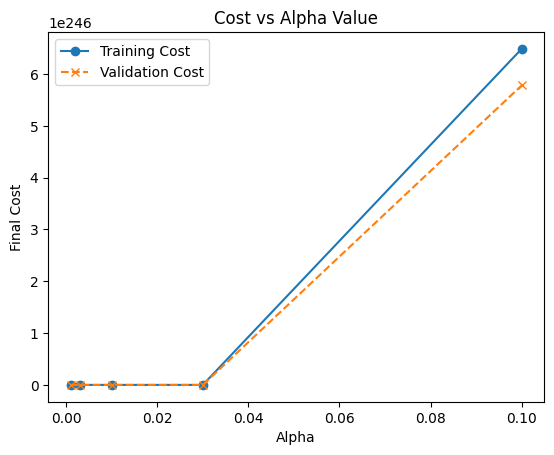

In [195]:
# Ploting final cost of each alpha for visual comparision
plt.plot(alphas, J_hist_alpha_train, label="Training Cost", marker='o')
plt.plot(alphas, J_hist_alpha_valid, label="Validation Cost", marker='x', linestyle='--')
plt.xlabel("Alpha")
plt.ylabel("Final Cost")
plt.title("Cost vs Alpha Value")
plt.legend()
plt.show()

In [196]:
w_final, J_hist_train, J_hist_valid = grad_desc(x_train_poly, y_train_split, x_valid_poly, y_valid_split, w_init, cost, gradient, best_alpha, iterations)

Iteration    0: Training Cost 3364.622055715868 	Validation Cost 3409.197808873431
Iteration 1000: Training Cost 8.323820914538086 	Validation Cost 9.402498596481157
Iteration 2000: Training Cost 7.757477643509079 	Validation Cost 8.74476192528323
Iteration 3000: Training Cost 7.356086748926115 	Validation Cost 8.262926494965175
Iteration 4000: Training Cost 7.004507418365633 	Validation Cost 7.847245660606316
Iteration 5000: Training Cost 6.693543144565609 	Validation Cost 7.482874399233486
Iteration 6000: Training Cost 6.417012691285626 	Validation Cost 7.16102439473197
Iteration 7000: Training Cost 6.17025014001857 	Validation Cost 6.875265678032514
Iteration 8000: Training Cost 5.949557929403472 	Validation Cost 6.620597017052266
Iteration 9000: Training Cost 5.751892029263021 	Validation Cost 6.392992904714625
Iteration 10000: Training Cost 5.574675123667477 	Validation Cost 6.1891301417137194
Final Training Cost: 5.574675123667477


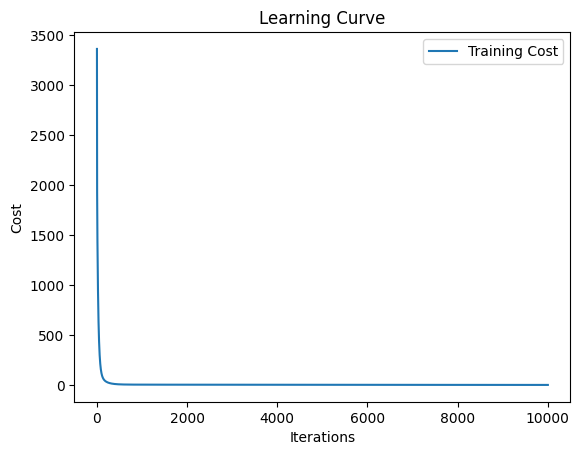

In [197]:
plt.plot(J_hist_train, label="Training Cost")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [198]:
#predicting values for the validation set and comparing with the given values
print("Validation Dataset:")
y_pred = np.dot(x_valid_poly,w_final)
for i in range(len(y_pred)):
    print(f"Prediction: {y_pred[i]:.2f}\t\tTarget Value: {y_valid_split[i]:.2f}")

Validation Dataset:
Prediction: 98.14		Target Value: 100.00
Prediction: 99.06		Target Value: 100.00
Prediction: 100.56		Target Value: 100.00
Prediction: 99.94		Target Value: 100.00
Prediction: 97.90		Target Value: 100.00
Prediction: 96.13		Target Value: 97.24
Prediction: 102.63		Target Value: 99.98
Prediction: 97.93		Target Value: 100.00
Prediction: 98.11		Target Value: 100.00
Prediction: 101.16		Target Value: 100.00
Prediction: 94.46		Target Value: 96.59
Prediction: 98.60		Target Value: 100.00
Prediction: 98.44		Target Value: 100.00
Prediction: 101.09		Target Value: 100.00
Prediction: 99.62		Target Value: 100.00
Prediction: 77.52		Target Value: 85.71
Prediction: 101.27		Target Value: 100.00
Prediction: 100.24		Target Value: 100.00
Prediction: 100.42		Target Value: 100.00
Prediction: 99.91		Target Value: 100.00
Prediction: 98.50		Target Value: 100.00
Prediction: 100.38		Target Value: 100.00
Prediction: 100.62		Target Value: 100.00
Prediction: 102.97		Target Value: 99.98
Prediction: 99.

In [199]:
def r_squared(y_actual, y_pred):
    sum_squares_tot = np.sum((y_actual-np.mean(y_actual))**2)
    sum_squares_resid = np.sum((y_actual-y_pred)**2)
    r2 = 1-(sum_squares_resid/sum_squares_tot)
    return r2

def mae(y_actual, y_pred):
    mae = np.mean(np.abs(y_actual - y_pred))
    return mae

def rms_error(y_actual, y_pred):
    mse = np.mean((y_actual-y_pred)**2)
    rmse = np.sqrt(mse)
    return rmse

In [200]:
#computing errors
print(f"R Squared Error: {r_squared(y_valid_split, y_pred)}")
print(f"Mean Absolute Error: {mae(y_valid_split, y_pred)}")
print(f"Root Mean Squared Error: {rms_error(y_valid_split, y_pred)}")

R Squared Error: 0.9253926070943524
Mean Absolute Error: 2.113435342517748
Root Mean Squared Error: 3.518275185858468


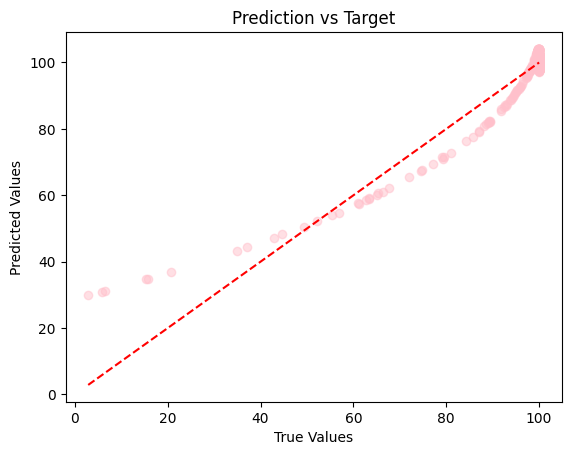

In [201]:
plt.scatter(y_valid_split, y_pred, color='pink', alpha=0.5)
plt.plot([min(y_valid_split), max(y_valid_split)], [min(y_valid_split), max(y_valid_split)], color='r', linestyle='--')
plt.title("Prediction vs Target")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

In [202]:
#predicting the values for juniors.csv
x_test_poly = poly_features(x_norm_t.to_numpy(), degree)
test_preds = np.dot(x_test_poly,w_final)
output_df["Quality Rating"] = test_preds
output_df.to_csv("Juniors_predictions.csv")